# Michaelis Menten model

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

(100, 4)


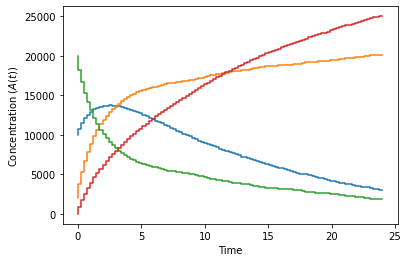

In [2]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

np.random.seed(1)
values = model.simulate(k, times)
print(values.shape)
# print("s = (" + str(len(times)) + ", " + str(model.n_outputs()) + ")")
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.MeanSquaredError(problem)

log_prior = pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

# Rejection ABC

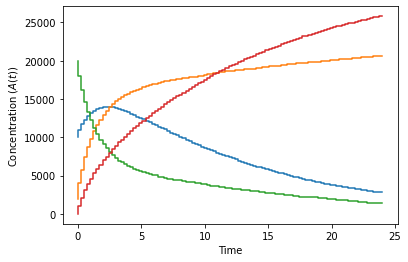

error is 539664.8375
0.7709497678571429
error is 580864.02
0.8298057428571429
error is 540067.8725
0.7715255321428572
error is 577573.495
0.8251049928571429
error is 577457.6525000001
0.8249395035714286
error is 421095.79500000004
0.6015654214285715
error is 648625.68
0.9266081142857143
error is 484967.7575
0.6928110821428571
error is 569004.8175000001
0.8128640250000002
error is 538078.2150000001
0.7686831642857144


In [6]:
params = [9.73387406e-06, 2.19430508e-01, 2.41308015e-01]

s_value = model.simulate(params, times)

plt.step(times, s_value)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

for i in range(10):
    err = error_measure(params)
    
    print("error is " + str(err))
    
    print(err/7e5)


In [9]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(7e5)

abc.set_parallel(True)

# set target number of samples
abc.set_n_samples(500)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in parallel with 8 worker processess.
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:07.2
2     16     0.125            0:11.5
3     32     0.15625          0:17.8
20    392    0.0586734694     3:03.6
40    648    0.0709876543     5:10.3
60    1032   0.0668604651     7:30.3
80    1616   0.0587871287    10:48.7
100   1904   0.0619747899    12:26.3
120   2352   0.0599489796    14:58.5
140   2856   0.0581232493    17:42.3
160   3248   0.0584975369    19:58.9
180   3624   0.0587748344    22:37.5
200   4112   0.0578793774    25:55.8
220   4464   0.0582437276    28:08.5
240   4784   0.0597826087    30:10.2
260   5272   0.05823217      33:32.1
280   5792   0.0568024862    36:49.1
300   6232   0.0571245186    39:08.3
320   6584   0.0578675577    40:57.9
340   7056   0.0582482993    43:25.1
360   7568   0.0576109937    46:07.8
380   7928   0.0577699294    48:07.1
400   8312   0.0578681424    50:07.9
cnt_sampled=8584
Halting: target nu

In [10]:
print(len(samples))

500


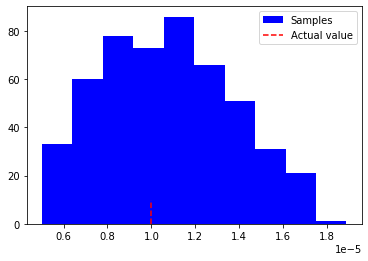

In [11]:

plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

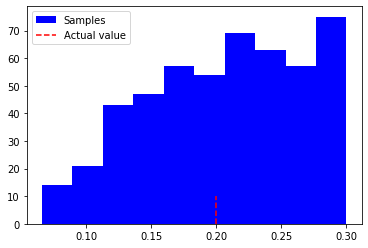

In [12]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

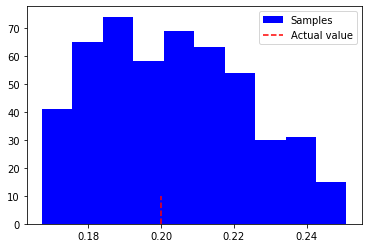

In [13]:
plt.hist(samples[:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC

In [22]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([3e6, 1e6, 7e5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(100)

abc.sampler().set_perturbation_kernel(
    pints.UniformLogPrior([-1e-6, -0.05, -0.1], [1e-6, 0.05, 0.1])
)

# set target number of samples
abc.set_n_samples(1000)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)
abc.set_log_interval(1)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in parallel with 8 worker processess.
Starting t=0, with threshold=3000000.0
Iter. Eval. Acceptance rate Time m:s
1     8      0.375            0:05.5
2     16     0.4375           0:09.5
3     24     0.375            0:13.1
4     32     0.375            0:17.1
5     40     0.4              0:20.2
6     48     0.395833333      0:22.9
7     72     0.347222222      0:32.0
8     88     0.306818182      0:38.1
9     96     0.3125           0:41.3
10    104    0.317307692      0:45.4
11    120    0.291666667      0:52.2
12    128    0.296875         0:55.8
13    136    0.294117647      0:58.8
14    152    0.289473684      1:05.4
15    160    0.3              1:08.8
16    168    0.297619047619   1:11.5
17    176    0.306818182      1:14.6
18    184    0.315217391      1:18.2
19    192    0.328125         1:22.8
20    200    0.34             1:26.5
21    208    0.331730769      1:30.8
22    216    0.342592593      1:34.7
23    224    0.334821429      1:38.0
24    232    

In [23]:
samples_flat = np.array([sublist for sublist in samples])

print(len(samples_flat))

1002


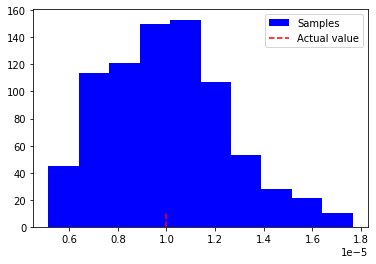

In [24]:
samples_flat = np.array([sublist for sublist in samples])

plt.hist(samples_flat[200:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

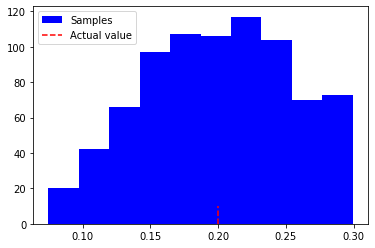

In [25]:
plt.hist(samples_flat[200:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

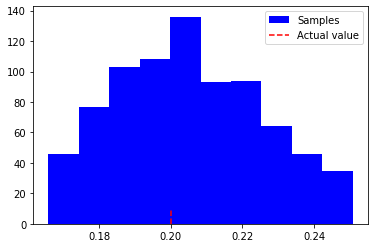

In [26]:
plt.hist(samples_flat[200:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# Adaptive PMC

In [16]:
np.random.seed(0)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(450)

# set p_acc_min
abc.sampler().set_p_acc_min(0.1)

# set target number of samples
abc.set_n_samples(500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in parallel with 8 worker processess.
w_mean=[1.20423192e-05 1.79144917e-01 2.43430531e-01]
resulting var=[[ 3.94561310e-11  5.94752357e-08 -3.93439210e-08]
 [ 5.94752357e-08  1.05940217e-02  1.73395399e-03]
 [-3.93439210e-08  1.73395399e-03  1.35545920e-02]]
epsilon=14060447.655000001
w_mean=[1.21787992e-05 1.72247623e-01 2.59267248e-01]
resulting var=[[ 2.99943276e-11 -4.68985185e-08 -1.54685121e-07]
 [-4.68985185e-08  9.21788245e-03  2.23662399e-03]
 [-1.54685121e-07  2.23662399e-03  1.22463870e-02]]
epsilon=11422789.235
w_mean=[1.16968185e-05 1.87203346e-01 2.51446127e-01]
resulting var=[[ 3.23630268e-11 -8.09323520e-08 -2.39099369e-07]
 [-8.09323520e-08  9.55645893e-03  3.67230523e-03]
 [-2.39099369e-07  3.67230523e-03  1.13827959e-02]]
epsilon=9547663.9975
w_mean=[1.20626138e-05 1.93792711e-01 2.48670100e-01]
resulting var=[[ 3.84495587e-11 -2.81345750e-08 -3.55596590e-07]
 [-2.81345750e-08  8.34226639e-03  2.87651161e-03]
 [-3.55596590e-

In [17]:
print(len(samples))

500


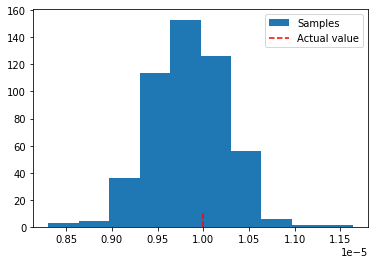

In [28]:
plt.hist(samples_adapt_pmc[:, 0], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

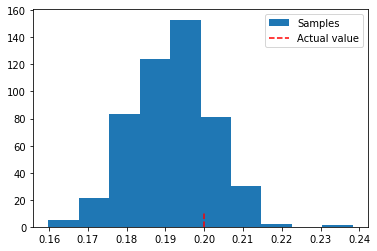

In [27]:
plt.hist(samples_adapt_pmc[:, 1], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

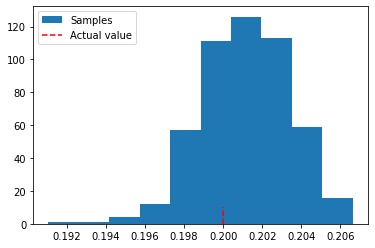

In [26]:
plt.hist(samples_adapt_pmc[:, 2], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# Save samples

In [14]:
samples_rej = samples

In [15]:
print(samples_rej.tolist())

[[9.41430243370637e-06, 0.23409265212622238, 0.2496671667236873], [9.108555593921391e-06, 0.21643886596537687, 0.22267829408385303], [5.796449062547489e-06, 0.09273983536383625, 0.1834908261719964], [1.0811753749927e-05, 0.2238757530528287, 0.21360571646909685], [1.544517675718868e-05, 0.25324439631959667, 0.18803201671008263], [8.639249568716468e-06, 0.11338634209821398, 0.19441062878400273], [1.5198281130155406e-05, 0.225554864329661, 0.17944007158057723], [1.5314046816003727e-05, 0.2999447992183642, 0.20414382654438926], [1.437781432009377e-05, 0.22831822304972538, 0.18870494333993082], [8.442089551645313e-06, 0.2026089348045188, 0.2136092691196814], [5.839652256681469e-06, 0.08865107883817154, 0.21804193508129105], [9.968571001816712e-06, 0.21750065840997596, 0.24111939605312618], [9.75167328528877e-06, 0.15939932698129328, 0.21196951954465865], [7.1558885428115225e-06, 0.12245476813748436, 0.21608742782993468], [7.979950492224588e-06, 0.12163020054632177, 0.2114140383946876], [1.3

In [27]:
samples_pmc_mod = samples

In [28]:
print(samples_pmc_mod.tolist())

[[1.1529835889274153e-05, 0.15509195052187225, 0.19910044630116225], [8.069729510567638e-06, 0.2048177415876659, 0.18989640210235698], [9.002409126543e-06, 0.20528345819232374, 0.2587426282831118], [8.304593106058397e-06, 0.13745657125082483, 0.2403362453746901], [8.02614839397448e-06, 0.2101016813037287, 0.24492095066552552], [1.0124204790066646e-05, 0.19178603190692733, 0.22826378898883304], [1.1551208945401988e-05, 0.24413979624927507, 0.26068125204929693], [9.853119763020483e-06, 0.11493618818678426, 0.21606696559622873], [1.7480253494517514e-05, 0.23418676407177824, 0.21376317008249127], [1.245610698101769e-05, 0.1537264593436718, 0.20526157039049217], [1.4657629012222925e-05, 0.21537033167886033, 0.1511431400451312], [1.822478353622823e-05, 0.24450203995211706, 0.1401862624515073], [1.7393747426512373e-05, 0.20589079614053268, 0.15301364847532783], [1.4440395842443734e-05, 0.12379307630493562, 0.15618596341056934], [6.429320783912056e-06, 0.12093895186631366, 0.1644773152392086],

In [19]:
samples_adapt_pmc = samples

In [20]:
print(samples_adapt_pmc.tolist())

[[1.02637280117346e-05, 0.20084011088849893, 0.20221154246911585], [9.477791625837596e-06, 0.18537276715262269, 0.19929255595437595], [1.0568378616303095e-05, 0.20442311579157474, 0.19974750885184178], [9.627099066556829e-06, 0.18830981193491952, 0.20250757470190223], [1.0329186795597662e-05, 0.1999850785569226, 0.20452794007007127], [9.617606844789881e-06, 0.18105023424548886, 0.1981136696421037], [9.825239101564433e-06, 0.19333908613115455, 0.2046306561582117], [9.579783275540703e-06, 0.18556844905683362, 0.20087356674881118], [9.379746905108052e-06, 0.1790844256050272, 0.2001996376948183], [9.794949972737826e-06, 0.18654356481537285, 0.20006677991046867], [9.839584285139457e-06, 0.189843062355188, 0.19879763303092596], [9.21247800677467e-06, 0.18171385211895344, 0.20404210708663684], [9.417954045673505e-06, 0.18928759769124384, 0.20137731906182327], [9.149388259652884e-06, 0.17183861406145504, 0.19952227908489056], [1.0637758336570642e-05, 0.21035762348837966, 0.199635579539931], [9